In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image
from datetime import date

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]
N_year = len(Years)

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Lats_edge = np.arange(-90,91,6)
Lons_edge = np.arange(-180,181,10)

Lats_mid = np.arange(-87,90,6)
Lons_mid = np.arange(-175,180,10)

# Levs    = [100, 75, 65, 55, 40, 30]
# Heights = [16, 18, 19, 20, 22, 24]
Levs    = [100, 75, 65, 55, 47, 40, 30] # hPa
Heights = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km
# [100, 75, 55, 40, 30]


N_lat = len(Lats_mid)
N_lon = len(Lons_mid)
N_lev = len(Levs) # 16, 18, 20, 22, 24 km

Lats_edge, Lons_edge, Lats_mid, Lons_mid, N_lat, N_lon, Lons_edge[-1]

(array([-90, -84, -78, -72, -66, -60, -54, -48, -42, -36, -30, -24, -18,
        -12,  -6,   0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,
         66,  72,  78,  84,  90]),
 array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180]),
 array([-87, -81, -75, -69, -63, -57, -51, -45, -39, -33, -27, -21, -15,
         -9,  -3,   3,   9,  15,  21,  27,  33,  39,  45,  51,  57,  63,
         69,  75,  81,  87]),
 array([-175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,  -75,
         -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,   35,
          45,   55,   65,   75,   85,   95,  105,  115,  125,  135,  145,
         155,  165,  175]),
 30,
 36,
 180)

In [4]:
# count the particle (injected at different height) number in each grid cell
N_day  = 20*366
Num_2D = np.zeros((N_lat, N_lon, N_lev, N_day)) 


In [5]:
for i_year in tqdm(range(N_year)):
    
    NUMs = np.zeros((N_lon*N_lat*N_day, N_lev))
    
    
    # 6 injection altitudes
    # File1 = open('/n/home12/hongwei/Paper_2/Plot_python/Num_Concnt/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
    File1 = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
    # File = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')

    Lines1 = File1.readlines()
    
    ii = 0
    for line1 in Lines1:
        a1 = line1.split(',')
        NUMs[ii,0] = float(a1[3])
        NUMs[ii,1] = float(a1[4])
        NUMs[ii,2] = float(a1[5])
        NUMs[ii,3] = float(a1[6])
        NUMs[ii,5] = float(a1[7])
        NUMs[ii,6] = float(a1[8])
        ii = ii+1

        
    # 21-km injection (only 19 km is needed here, 21-km is never used in the following)
    File2 = open('/n/home12/hongwei/HONGWEI/Paper_2/Plot_python/21km_post_process/Num_Concnt_21km/Num_Concnt_2000_'+Years[i_year]+'_21km.txt', 'r')
    # File2 = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'_21km.txt', 'r')
    Lines2 = File2.readlines()
    
    ii = 0
    for line2 in Lines2:
        a2 = line2.split(',')
        NUMs[ii,4] = float(a2[3])
        ii = ii+1        

        
    # remap to global (Lon,Lat) mesh
    Num_2D_temp = np.zeros((N_lat, N_lon, N_lev, N_day)) 
    for i_day in range(N_day):
        for ix in range(N_lon):
            for iy in range(N_lat):
                ii = i_day*(N_lat*N_lon) + ix*N_lat + iy
                Num_2D_temp[iy, ix, :, i_day] = NUMs[ii,:]
               
            
    Num_2D = Num_2D + Num_2D_temp            
    
print(ii)


100%|██████████| 10/10 [07:16<00:00, 43.69s/it]

7905599


# *** important check ***

(1) The lat dimension should start from 20 and end at -20 for the input data in the following plotting code!!!

(2) The lon dimension should start from -180 and end at 180 for the input data in the following plotting code!!!

In [6]:
# change (-20,20) to (20,-20)

print("LAT Before: ", Lats_mid)

if Lats_mid[0]<Lats_mid[-1]:
    Lats_edge = Lats_edge[::-1]
    Lats_mid = Lats_mid[::-1]
    Num_2D[:, :, :, :] = Num_2D[::-1, :, :, :]

print("LAT After: ", Lats_mid)


LAT Before:  [-87 -81 -75 -69 -63 -57 -51 -45 -39 -33 -27 -21 -15  -9  -3   3   9  15
  21  27  33  39  45  51  57  63  69  75  81  87]
LAT After:  [ 87  81  75  69  63  57  51  45  39  33  27  21  15   9   3  -3  -9 -15
 -21 -27 -33 -39 -45 -51 -57 -63 -69 -75 -81 -87]


In [7]:
Num_2D_new = Num_2D


In [8]:
# monthly data
# To simplify, assume all months have 30 days

N_month = 20*12

Num_2D_month = np.zeros((N_lat, N_lon, N_lev, N_month))

for i_mon in range(N_month):
    Num_2D_month[:,:,:,i_mon] = np.mean(Num_2D_new[:,:,:,i_mon*30:(i_mon+1)*30], axis=3)


In [9]:
import matplotlib.font_manager
import matplotlib
from matplotlib.font_manager import findfont, FontProperties
print(matplotlib.get_cachedir()) # should return something like ~/.matplotlib
font = findfont(FontProperties(family=['sans-serif']))

/n/home12/hongwei/.cache/matplotlib


(7, 240)


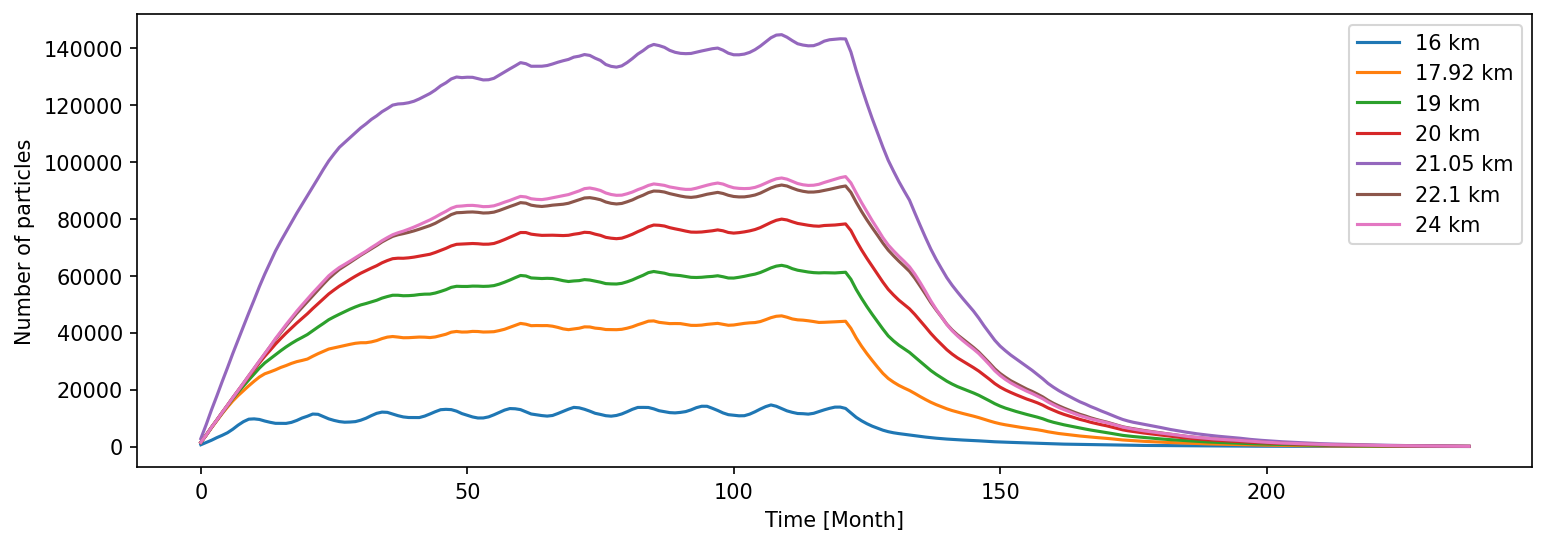

In [10]:
#------------------------------------------------------------------
# plot the time series of the total particle number

iday_begin = 0
iday_end = -1

total_num_month = np.sum( Num_2D_month, axis=(0,1) )
print(total_num_month.shape)

#
fig = plt.figure(figsize=(12,4), dpi=150)

imon_begin = 0
imon_end = -1

plt.plot(total_num_month[0,iday_begin:iday_end], label=f"{Heights[0]} km")
plt.plot(total_num_month[1,iday_begin:iday_end], label=f"{Heights[1]} km")
plt.plot(total_num_month[2,iday_begin:iday_end], label=f"{Heights[2]:.0f} km")
plt.plot(total_num_month[3,iday_begin:iday_end], label=f"{Heights[3]:.0f} km")
plt.plot(total_num_month[4,iday_begin:iday_end], label=f"{Heights[4]} km")
plt.plot(total_num_month[5,iday_begin:iday_end], label=f"{Heights[5]} km")
plt.plot(total_num_month[6,iday_begin:iday_end], label=f"{Heights[6]} km")


# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Time [Month]")
plt.ylabel("Number of particles")


plt.legend();

In [11]:
#  get 2005.1 - 2009.12

# 19 km
Num_Month_19km = total_num_month[2,5*12:10*12]

Num_Month_19km.shape

(60,)

## QBO index

In [37]:
import pywt
import scipy.signal as Signal
# from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image


In [38]:

# QBO for singapore obs data:
# https://acd-ext.gsfc.nasa.gov/Data_services/met/qbo/QBO_Singapore_Uvals_GSFC.txt
df = pd.read_fwf('../QBO_Singapore_index.txt', sep=" ")

# get 2005.1 - 2009.12
idx1 = (2005-1979)*12
df2 = df.iloc[idx1:idx1+5*12]

df2.head()

,Month,Year,100,90,80,70,50,40,30,20,15,10
312,1,2005,-2.53,-1.13,-2.62,0.50,5.38,9.65,-1.64,-28.39,-28.37,-25.98
313,2,2005,2.60,0.68,-0.35,1.95,9.88,11.87,1.67,-29.76,-30.79,-31.41
314,3,2005,-8.15,-4.47,1.75,7.71,14.51,15.05,-1.02,-29.72,-33.98,-34.78
315,4,2005,-0.50,-0.18,0.88,2.79,8.16,5.73,-18.22,-32.82,-34.12,-35.27
316,5,2005,-9.23,-8.89,-0.62,6.73,8.36,-8.09,-26.69,-33.13,-34.52,-37.37


In [39]:
df2.tail()

,Month,Year,100,90,80,70,50,40,30,20,15,10
367,8,2009,-15.89,-5.79,3.54,5.83,8.10,1.92,-22.02,-33.52,-36.59,-11.04
368,9,2009,-10.40,0.56,3.53,7.03,11.10,4.74,-22.04,-34.81,-37.32,-22.16
369,10,2009,-6.75,1.45,6.86,9.26,10.63,2.40,-20.16,-35.38,-38.95,-17.39
370,11,2009,-2.48,2.23,4.87,6.88,8.53,-4.48,-25.24,-33.30,-37.02,-4.97
371,12,2009,-5.73,-3.89,1.12,6.37,10.21,-5.35,-26.05,-33.54,-37.53,-10.73


[[1.         0.48793457]
 [0.48793457 1.        ]]


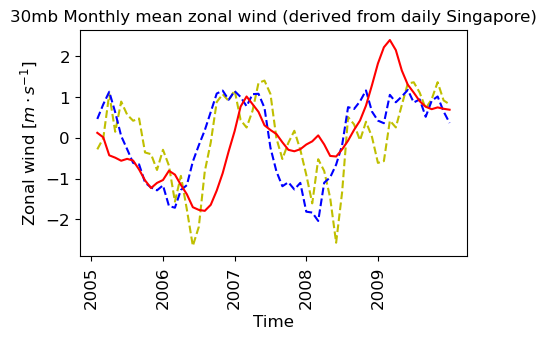

In [46]:
U40 = df2['40']
U50 = df2['50']
U70 = df2['70']
U80 = df2['80']
U90 = df2['90']
U_total = (U40+U50+U70+U80+U90)/5

month = np.arange(1,len(U50)+1,1)

fig = plt.figure(figsize=(5,3),dpi=100)

data40 = (U40 - np.mean(U40))/np.std(U40)
data50 = (U50 - np.mean(U50))/np.std(U50)
data70 = (U70 - np.mean(U70))/np.std(U70)
data80 = (U80 - np.mean(U80))/np.std(U80)
data90 = (U90 - np.mean(U90))/np.std(U90)
data_total = (U_total - np.mean(U_total))/np.std(U_total)

data2 = (Num_Month_19km - np.mean(Num_Month_19km))/np.std(Num_Month_19km)

# plt.plot(month, data40, 'k--')
# plt.plot(month, data50, 'b--')
plt.plot(month, data70, 'y--')
# plt.plot(month, data80, 'g--')
# plt.plot(month, data90, 'r--')

plt.plot(month, data_total, 'b--')

plt.plot(month, data2, 'r-')


tick_locs = np.arange(0,len(month),12)
tick_lbls = np.arange(2005,2010,1)
plt.xticks(tick_locs, tick_lbls, rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)


plt.title('30mb Monthly mean zonal wind (derived from daily Singapore)', fontsize=12)
plt.ylabel('Zonal wind [$m \cdot s^{-1}$]', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.legend(loc='lower left');

print(np.corrcoef(U50, Num_Month_19km))

In [16]:
# matplotlib.get_cachedir()

'/n/home12/hongwei/.cache/matplotlib'

In [47]:
# detrand
Num_Month_19km_detrend = Signal.detrend(Num_Month_19km)
print(Num_Month_19km_detrend.shape)

# deseasonal
N_total = len(Num_Month_19km_detrend)
Num_Month_19km_detrend_deseason = 0.0*Num_Month_19km_detrend

for idx in range(N_total):
    idx2 = idx % 12
    Num_Month_19km_detrend_deseason[idx] = Num_Month_19km_detrend[idx] \
                                         - np.mean(Num_Month_19km_detrend[idx2:N_total:12])

(60,)


[[1.         0.48793457]
 [0.48793457 1.        ]]
[[1.         0.39783859]
 [0.39783859 1.        ]]
[[1.         0.49355557]
 [0.49355557 1.        ]]


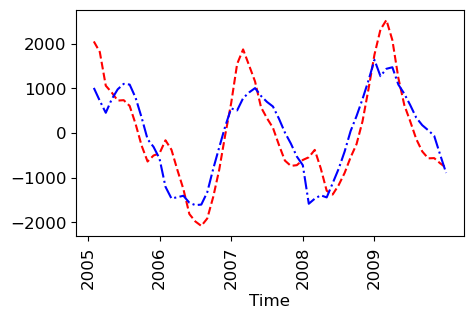

In [48]:
fig = plt.figure(figsize=(5,3),dpi=100)

# plt.plot(month, Num_Month_19km, 'k-')
plt.plot(month, Num_Month_19km_detrend, 'r--')
plt.plot(month, Num_Month_19km_detrend_deseason, 'b-.')


tick_locs = np.arange(0,len(month),12)
tick_lbls = np.arange(2005,2010,1)
plt.xticks(tick_locs, tick_lbls, rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)


# plt.title('30mb Monthly mean zonal wind (derived from daily Singapore)', fontsize=12)
# plt.ylabel('Zonal wind [$m \cdot s^{-1}$]', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.legend(loc='lower left');

print(np.corrcoef(U50, Num_Month_19km))
print(np.corrcoef(U50, Num_Month_19km_detrend))
print(np.corrcoef(U50, Num_Month_19km_detrend_deseason))

In [49]:
# calculate the increaseing rate

Num_Month_19km_line = Num_Month_19km-Num_Month_19km_detrend

(Num_Month_19km_line[2]-Num_Month_19km_line[1])*12/1e5,Num_Month_19km_line[51]-Num_Month_19km_line[50]
# plt.plot(Num_Month_19km_detrend)

(0.007549306362878415, 62.9108863573274)

[[1.         0.82833843]
 [0.82833843 1.        ]]
[[1.         0.82321169]
 [0.82321169 1.        ]]
[[1.         0.62201288]
 [0.62201288 1.        ]]
[[1.         0.52231498]
 [0.52231498 1.        ]]
[[1.         0.50632645]
 [0.50632645 1.        ]]


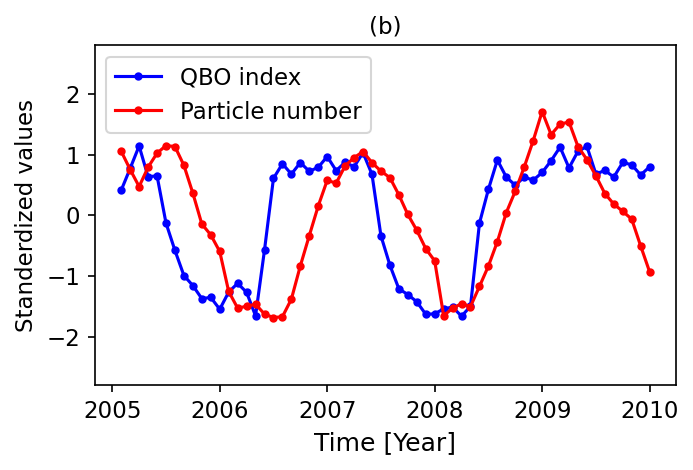

In [79]:
#

fig = plt.figure(figsize=(5,3),dpi=150)
# fig = plt.figure(figsize=(10,5),dpi=100)

data40 = (U40 - np.mean(U40))/np.std(U40)
data50 = (U50 - np.mean(U50))/np.std(U50)
data70 = (U70 - np.mean(U70))/np.std(U70)
data80 = (U80 - np.mean(U80))/np.std(U80)
data90 = (U90 - np.mean(U90))/np.std(U90)
data_total = (U_total - np.mean(U_total))/np.std(U_total)

data2 = (Num_Month_19km_detrend_deseason - np.mean(Num_Month_19km_detrend_deseason))\
        /np.std(Num_Month_19km_detrend_deseason)

# plt.plot(month, data70, 'b.-', label='QBO index')

plt.plot(month, data50, 'b.-', label='QBO index')

# plt.plot(month, data50, 'g--', label='QBO index 80hPa')
# plt.plot(month, data70, 'k--', label='QBO index 70hPa')
# plt.plot(month, data80, 'c--', label='QBO index 80hPa')
# plt.plot(month, data90, 'b--', label='QBO index 80hPa')
plt.plot(month, data2, 'r.-', alpha=1, label='Particle number')


tick_locs = np.arange(0,len(month)+1,12)
tick_lbls = np.arange(2005,2011,1)
plt.xticks(tick_locs, tick_lbls, rotation='horizontal', fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-2.8,2.8)

# 50mb Monthly mean zonal wind (derived from daily Singapore
plt.title('(b)', fontsize=11)
plt.ylabel('Standerdized values', fontsize=11)
plt.xlabel('Time [Year]', fontsize=12)
plt.legend(loc='upper left', fontsize=11);

# print(np.corrcoef(U40, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U50, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U70, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U80, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U90, Num_Month_19km_detrend_deseason))

print(np.corrcoef(data_total[0:57], Num_Month_19km_detrend_deseason[3:60]))
print(np.corrcoef(data50[0:56], Num_Month_19km_detrend_deseason[4:60]))
print(np.corrcoef(data70, Num_Month_19km_detrend_deseason))
print(np.corrcoef(data80, Num_Month_19km_detrend_deseason))
print(np.corrcoef(data90, Num_Month_19km_detrend_deseason))

In [63]:
data_total.shape

(60,)

# ENSO index (MEI)

In [21]:
File1 = open('/n/home12/hongwei/Paper_3_QBO/ENSO/Multivariate_ENSO_Index_read.txt', 'r')
        
Lines1 = File1.readlines()

N_yr = 2022-1979+1
N_mon = 12

MEI = np.zeros((N_mon, N_yr))

# Strips the newline character
iyr=0
i = 1
for line1 in Lines1:
    if i>=2:
        iyr = i-2
        if iyr>N_yr-1: break
        a1 = line1.split(',')
        
        for j in range(1,len(a1)):
            imon = j-1
            MEI[imon,iyr] = float(a1[j])
    
    i = i+1
    

In [22]:
df = pd.read_fwf('/n/home12/hongwei/Paper_3_QBO/ENSO/Multivariate_ENSO_Index.txt', sep=" ", header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1979,0.47,0.26,-0.08,0.20,0.27,-0.15,-0.14,0.44,0.38,0.24,0.52,0.65
1,1980,0.35,0.19,0.41,0.59,0.55,0.62,0.62,0.15,0.20,0.09,-0.03,-0.06
2,1981,-0.33,-0.24,0.33,0.41,-0.27,-0.60,-0.51,-0.31,-0.01,-0.10,-0.22,-0.16
3,1982,-0.38,-0.47,-0.28,-0.34,-0.03,0.78,1.79,2.02,1.81,1.93,2.28,2.48
4,1983,2.57,2.74,2.68,2.79,2.89,2.02,0.75,-0.11,-0.41,-0.43,-0.43,-0.43


In [23]:
# get 2005.1 - 2009.12
idx1 = 2005-1979
df2 = df.iloc[idx1:idx1+5]

df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
26,2005,0.08,0.61,0.82,0.13,0.18,0.20,-0.02,-0.01,-0.05,-0.71,-0.75,-0.73
27,2006,-0.68,-0.50,-0.61,-0.84,-0.43,-0.23,0.11,0.56,0.63,0.68,0.90,0.59
28,2007,0.62,0.39,-0.22,-0.36,-0.44,-0.86,-0.77,-0.93,-1.10,-1.14,-1.13,-1.22
29,2008,-1.08,-1.27,-1.54,-1.13,-0.98,-0.86,-0.87,-1.08,-1.07,-1.12,-1.05,-1.05
30,2009,-1.01,-0.85,-0.94,-0.81,-0.72,-0.06,0.49,0.52,0.39,0.56,1.05,0.96


In [24]:

MEI_index =   list(df2.iloc[0][1::].values) \
            + list(df2.iloc[1][1::].values) \
            + list(df2.iloc[2][1::].values)\
            + list(df2.iloc[3][1::].values)\
            + list(df2.iloc[4][1::].values)

MEI_index = np.array(MEI_index)

# MEI_index

[[1.         0.42506996]
 [0.42506996 1.        ]]
[[1.         0.05057055]
 [0.05057055 1.        ]]


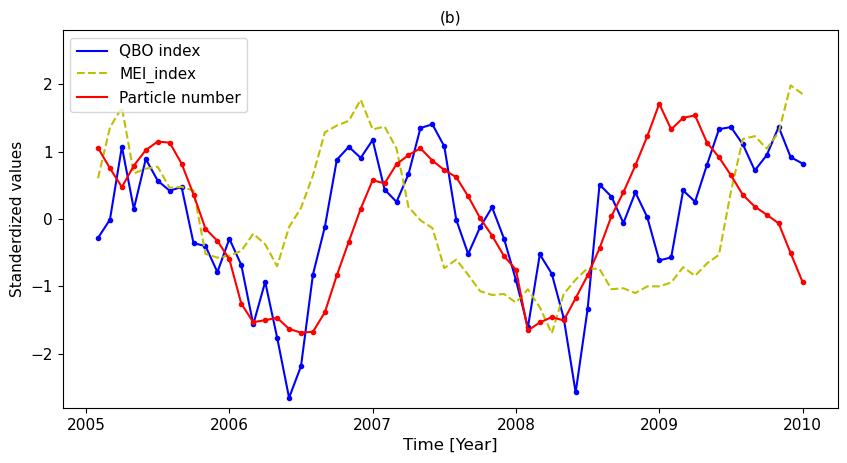

In [25]:
#

# fig = plt.figure(figsize=(5,3),dpi=100)
fig = plt.figure(figsize=(10,5),dpi=100)

MEI_index = (MEI_index - np.mean(MEI_index))/np.std(MEI_index)

data70 = (U70 - np.mean(U70))/np.std(U70)


data2 = (Num_Month_19km_detrend_deseason - np.mean(Num_Month_19km_detrend_deseason))\
        /np.std(Num_Month_19km_detrend_deseason)

plt.plot(month, data70, 'b.', )
plt.plot(month, data70, 'b-', label='QBO index')
plt.plot(month, MEI_index, 'y--', label='MEI_index')
# plt.plot(month, data80, 'g--', label='QBO index 80hPa')
plt.plot(month, data2, 'r.')
plt.plot(month, data2, 'r-', alpha=1, label='Particle number')


tick_locs = np.arange(0,len(month)+1,12)
tick_lbls = np.arange(2005,2011,1)
plt.xticks(tick_locs, tick_lbls, rotation='horizontal', fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-2.8,2.8)

# 50mb Monthly mean zonal wind (derived from daily Singapore
plt.title('(b)', fontsize=11)
plt.ylabel('Standerdized values', fontsize=11)
plt.xlabel('Time [Year]', fontsize=12)
plt.legend(loc='upper left', fontsize=11);

print(np.corrcoef(U70, Num_Month_19km_detrend))
print(np.corrcoef(MEI_index, Num_Month_19km_detrend))


# Wavelet & Fourier Analysis

https://towardsdatascience.com/wavelet-fourier-analysis-on-the-enso-and-monsoon-data-in-python-31504eeadc2c

In [26]:

# plt.style.use('seaborn')

In [27]:
total_num_month.shape

(7, 240)

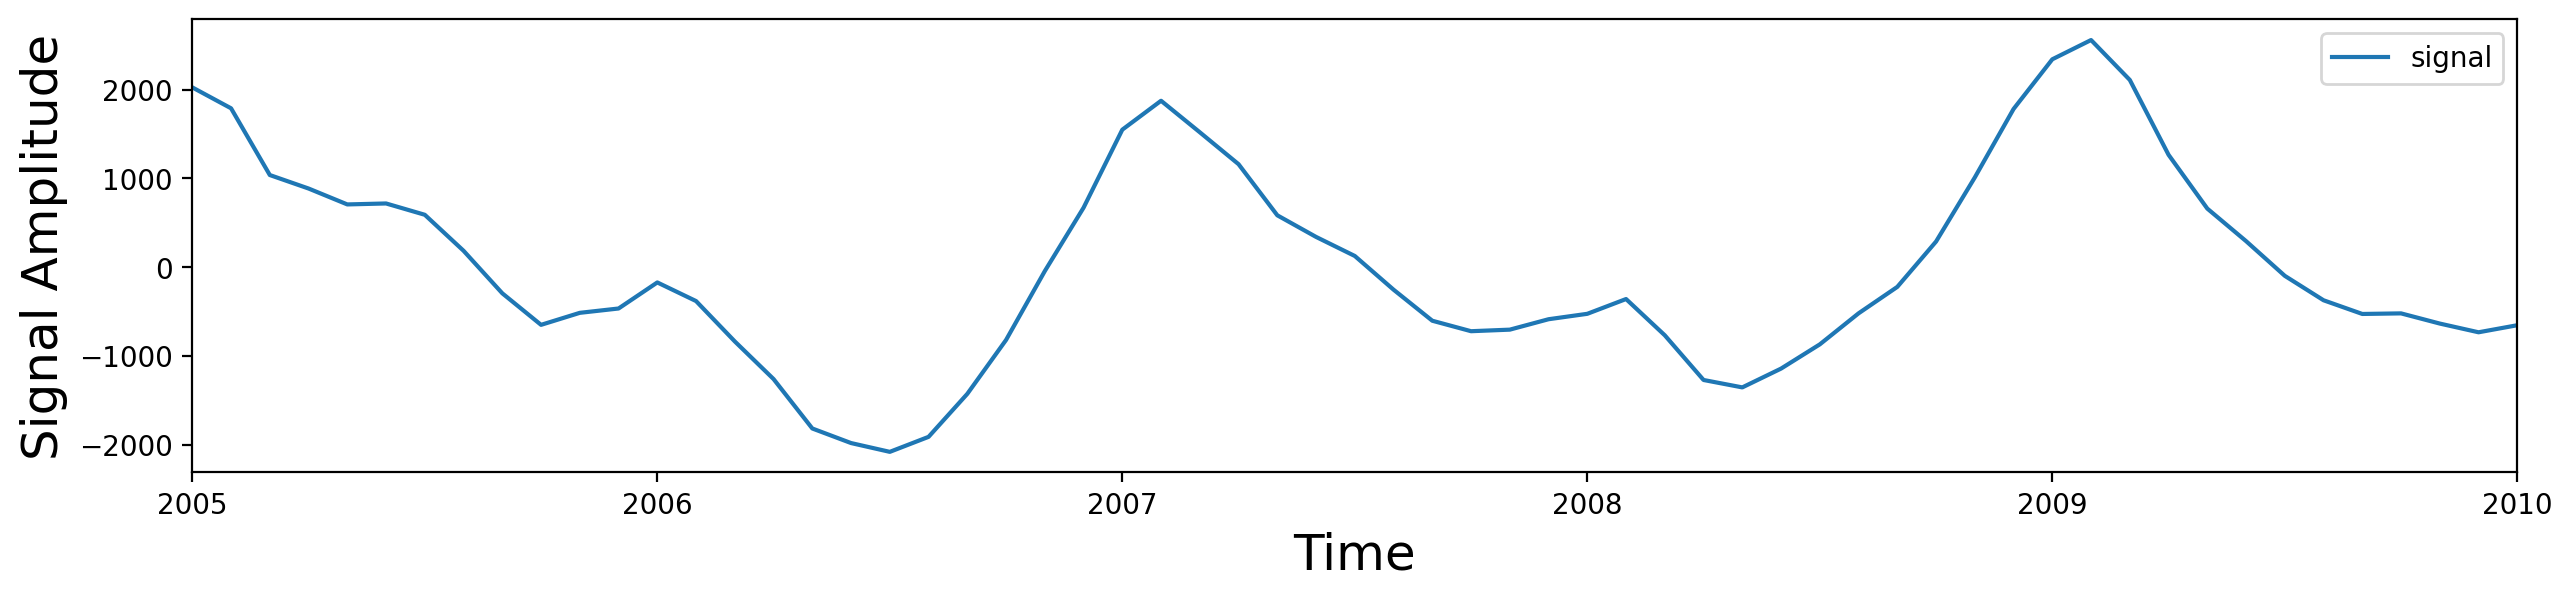

In [28]:
iz = 2

imon_begin = 12*5 # 2005
imon_end = 12*10+1 # 2010

df_nino = np.array(total_num_month[iz,imon_begin:imon_end])

N = len(df_nino)
t0 = 2005
dt = 1/12 # [year]
time = np.arange(0, N) * dt + t0

signal = df_nino #to get the scalar values
# signal = signal - np.mean(signal)
signal = Signal.detrend(signal)

scales = np.arange(1, 128) #set the wavelet scales

def plot_signal(time, signal, average_over=5, figname=None):
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(time, signal, label='signal')
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    # ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    if not figname:
        plt.savefig('signal_plot.png', dpi=200, bbox_inches='tight')
    else:
        plt.savefig(figname, dpi=200, bbox_inches='tight')
    plt.close('all')

plot_signal(time, signal) #plot and label the axis

Image('signal_plot.png') 

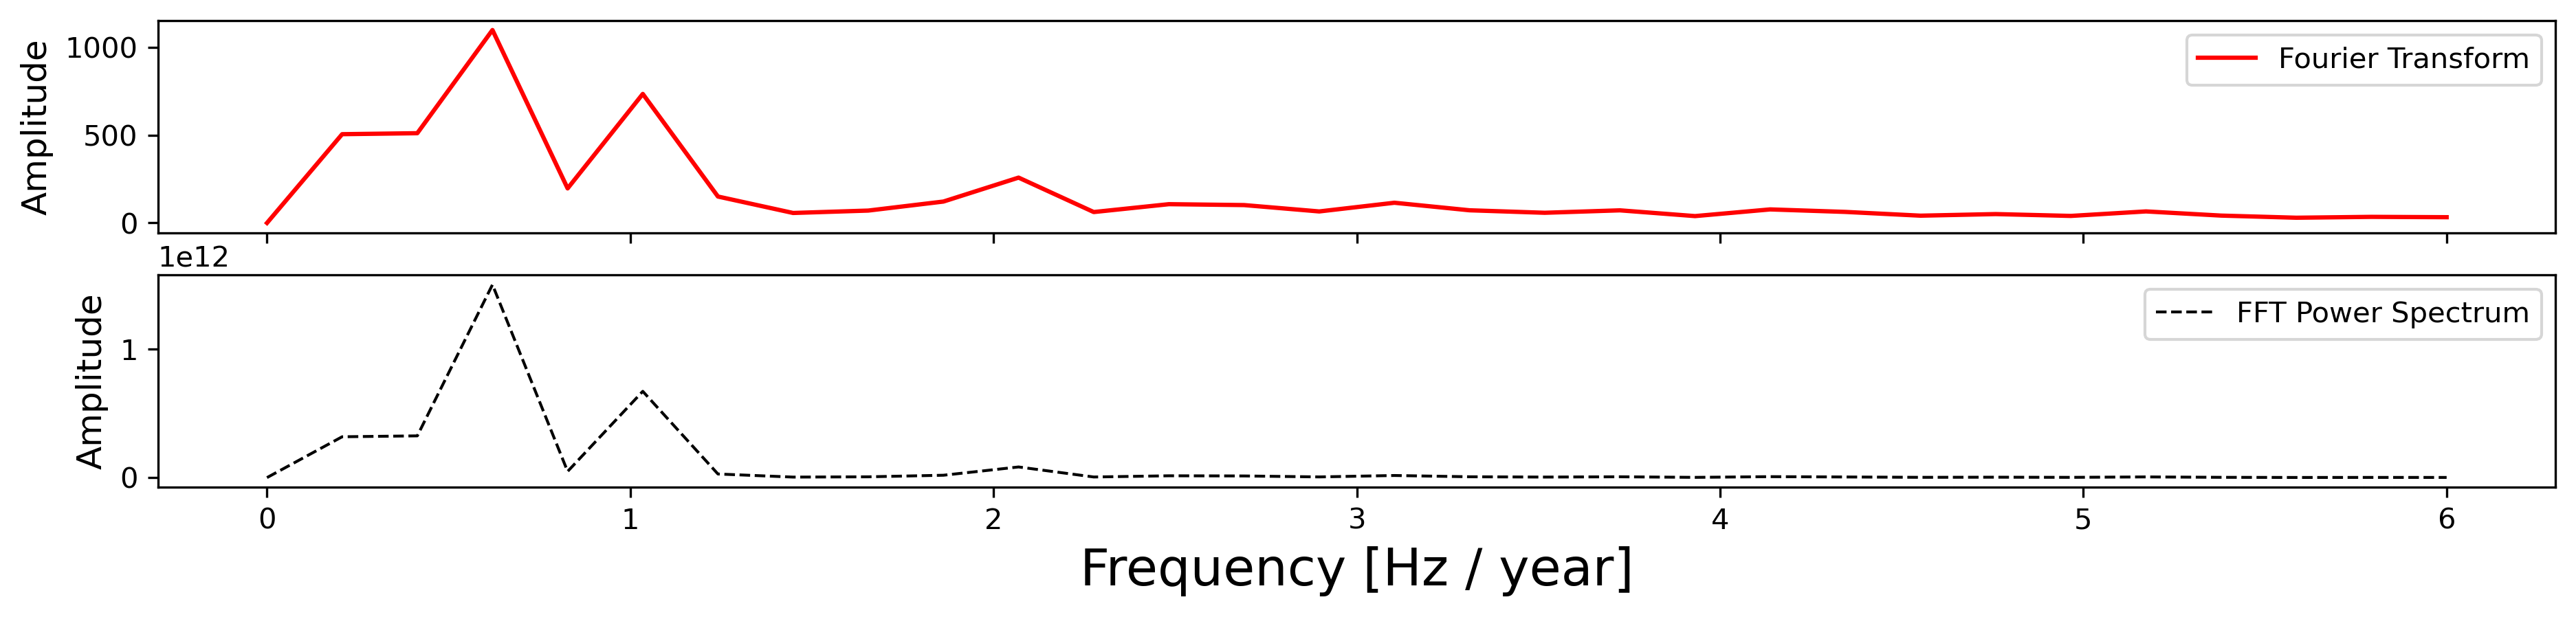

In [29]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = np.fft.fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal, figname=None):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    fig, ax = plt.subplots(2, 1, figsize=(15, 3), sharex=True)
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2  # FFT power spectrum
    ax[0].plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax[1].plot(f_values, fft_power, 'k--',
               linewidth=1, label='FFT Power Spectrum')
    ax[1].set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax[1].set_ylabel('Amplitude', fontsize=12)
    ax[0].set_ylabel('Amplitude', fontsize=12)
    ax[0].legend()
    ax[1].legend()
    # plt.subplots_adjust(hspace=0.5)
    if not figname:
        plt.savefig('fft_plus_power.png', dpi=300, bbox_inches='tight')
    else:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    plt.close('all')

plot_fft_plus_power(time, signal)

Image('fft_plus_power.png') 

[0.5        0.58333333 0.66666667 0.75       0.83333333 0.91666667
 1.         1.08333333 1.16666667 1.25       1.33333333 1.41666667
 1.5        1.58333333 1.66666667 1.75       1.83333333 1.91666667
 2.         2.08333333 2.16666667 2.25       2.33333333 2.41666667
 2.5        2.58333333 2.66666667 2.75       2.83333333 2.91666667
 3.         3.08333333 3.16666667 3.25       3.33333333 3.41666667
 3.5        3.58333333 3.66666667 3.75       3.83333333 3.91666667
 4.         4.08333333]
(44,)
(44, 61)
[2005.         2005.08333333 2005.16666667 2005.25       2005.33333333
 2005.41666667 2005.5        2005.58333333 2005.66666667 2005.75
 2005.83333333 2005.91666667 2006.         2006.08333333 2006.16666667
 2006.25       2006.33333333 2006.41666667 2006.5        2006.58333333
 2006.66666667 2006.75       2006.83333333 2006.91666667 2007.
 2007.08333333 2007.16666667 2007.25       2007.33333333 2007.41666667
 2007.5        2007.58333333 2007.66666667 2007.75       2007.83333333
 2007.916

<ipython-input-30-0ce43c073df7>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2005,2006,2007,2008,2009,2010], fontsize=11)


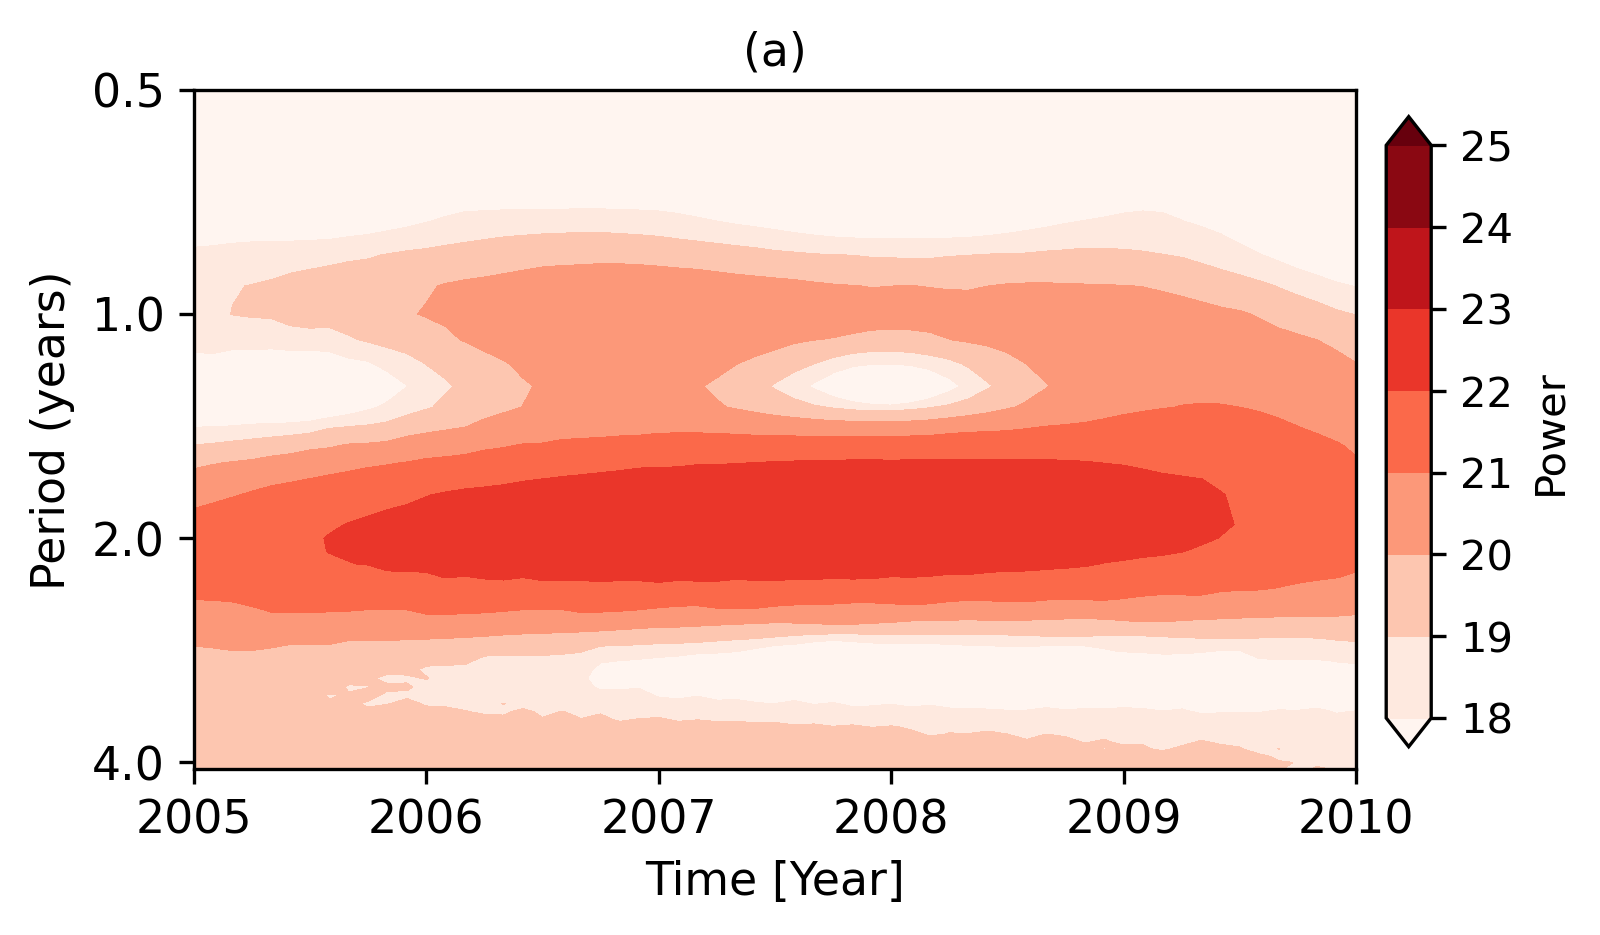

In [30]:
def plot_wavelet(time, signal, scales, waveletname='cmor1.5-1.0', cmap=plt.cm.Reds, \
                 title=f'(a)', \
                 ylabel='Period (years)', xlabel='Time [Year]', figname=None):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    
    idx1 = 5
    idx2 = 49
    
    period2 = period[idx1:idx2]
    power2 = power[idx1:idx2,:]
    

    print(period[idx1:idx2])
    print(period[idx1:idx2].shape)
    print(coefficients[idx1:idx2,:].shape)
    
    scale0 = 8*8*8*8*8*8
    numlevels = 8

    levels = [scale0]
    for ll in range(1, numlevels):
        scale0 *= 2
        levels.append(scale0)
#         print()

    contourlevels = np.log2(levels)
    
#     print(contourlevels)
    
    fig, ax = plt.subplots(figsize=(5, 3))
    im = ax.contourf(time, np.log2(period2), np.log2(power2),
                     contourlevels, extend='both', cmap=cmap)
    
    ax.set_title(title, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_xlabel(xlabel, fontsize=11)
    
    yticks = 2**np.arange(np.ceil(np.log2(period2.min())),
                          np.ceil(np.log2(period2.max())))
    
#     yticks = 2**np.arange(np.ceil(np.log2(0.5)),
#                           np.ceil(np.log2(5.0)))
    
#     print(period2.min(), period2.max())
#     print(np.log2(period2.min()), np.log2(period2.max()))
#     print(np.ceil(np.log2(period2.min())), np.ceil(np.log2(period2.max())))
    
    ax.set_yticks(np.log2(yticks))
#     print(yticks, np.log2(yticks))
    
    ax.set_yticklabels(yticks, fontsize=11)
    ax.set_xticklabels([2005,2006,2007,2008,2009,2010], fontsize=11)
    
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
#     ax.set_xlim(time[0], time[-1])
    print(time)
    
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical", label='Power')
    
    if not figname:
        plt.savefig('wavelet_{}.png'.format(waveletname),
                    dpi=300, bbox_inches='tight')
    else:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    plt.close('all')

plot_wavelet(time, signal, scales)

Image('wavelet_cmor1.5-1.0.png')

In [31]:
a = 2
a *=4

In [32]:
period

NameError: name 'period' is not defined

In [ ]:
time